In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("de.csv")
data.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_LOCATION,DEM_POSTAL,DEM_STDNT,DEM_VET,DEM_HEALTH,...,COD_NMU_NTY,DIHY_NMU_NTY,FENT_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2018-01-12 08:08:01,3,2,1,21,1,786,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-14 08:08:30,3,2,1,24,1,797,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-14 07:31:08,3,2,1,19,1,717,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-13 04:25:19,3,2,1,19,1,891,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-14 12:58:09,3,2,1,20,1,791,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
demo = data[['DEM_GENDER','DEM_AGE','DEM_LOCATION','DEM_STDNT','DEM_VET','DEM_HEALTH',
            'DEM_INCOME','DEM_MARITAL','DEM_EDU','DEM_PREG','DEM_PREGMNTH','DAST_CAT']]
corr_matrix = demo.corr()
corr_matrix["DAST_CAT"].sort_values(ascending=False)

DAST_CAT        1.000000
DEM_STDNT       0.068532
DEM_PREG        0.056483
DEM_HEALTH      0.044038
DEM_MARITAL     0.017908
DEM_LOCATION   -0.000108
DEM_VET        -0.011175
DEM_PREGMNTH   -0.015850
DEM_EDU        -0.037102
DEM_INCOME     -0.049980
DEM_GENDER     -0.050999
DEM_AGE        -0.175938
Name: DAST_CAT, dtype: float64

In [31]:
def get_use_cat(df):
    # make new df so old dataset is not affected
    new_df = df.copy()
    # get list of drug names
    drugs = [x for x in df.columns if 'NMU' in x][:14]
    drugs = [x.split('_')[0] for x in drugs]
    # make categorical variable for each drug
    for drug in drugs:
        new_df[f'{drug}_USE_CAT'] = new_df[f'{drug}_USE'] + new_df[f'{drug}_NMU']
        new_df[f'{drug}_USE_CAT'].fillna(value=0, inplace=True)
    # in the returned df, each drug now has a column indicating how the correspondent uses the drug
    # 0 -> never used
    # 1 -> used for perscription purposes
    # 2 -> used for recreational purposes
    return new_df

In [69]:
get_use_cat(data)

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_LOCATION,DEM_POSTAL,DEM_STDNT,DEM_VET,DEM_HEALTH,...,OXY_USE_CAT,TRAM_USE_CAT,TAP_USE_CAT,SUF_USE_CAT,COD_USE_CAT,DIHY_USE_CAT,HYDM_USE_CAT,STIM_USE_CAT,BENZ_USE_CAT,THC_USE_CAT
0,2018-01-12 08:08:01,3,2,1,21,1,786,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018-01-14 08:08:30,3,2,1,24,1,797,1,0,1,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
2,2018-01-14 07:31:08,3,2,1,19,1,717,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-13 04:25:19,3,2,1,19,1,891,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-14 12:58:09,3,2,1,20,1,791,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15046,2018-01-03 09:49:10,3,2,2,56,16,985,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15047,2017-12-31 09:13:52,3,2,2,63,16,990,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15048,2018-01-02 02:49:02,3,2,2,62,16,986,0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
15049,2018-01-03 02:33:08,3,2,2,67,16,77,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def get_drug_names(df):
    # returns a list of drug names for convenience
    drugs = [x for x in df.columns if 'NMU' in x][:14]
    drugs = [x.split('_')[0] for x in drugs]
    return drugs

In [46]:
def calculate_proportions(df):
    df = get_use_cat(df)
    new_df = df.copy()
    drugs = get_drug_names(df)
    # empty dict to insert values
    d = {}
    # for each drug, get proportions of recreational use
    for drug in drugs:
        # get number of people for prescription and recreational purposes
        num_pre = new_df[f'{drug}_USE_CAT'].value_counts().loc[1.0]
        num_rec = new_df[f'{drug}_USE_CAT'].value_counts().loc[2.0]
        # get percentage of recreational usage
        percentage = num_rec / (num_pre + num_rec)
        # insert into dictionary
        d[drug] = percentage
    return d

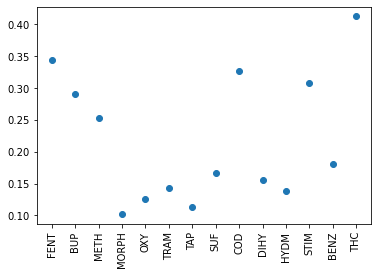

In [96]:
D = calculate_proportions(data)
plt.scatter(range(len(D)), list(D.values()))
plt.xticks(range(len(D)), list(D.keys()), rotation = 90)
plt.show()

In [133]:
# the function plots of every type of drug use given a particular segmentation
# if you don't want segmentation, i.e. if you only want to look at whole data, set seg=False
def plot_pattern(df1, seg, segment): 
    df = df1.copy()
    if seg == False:
    #segement could be any demographic or other variables, the segment must be mutually exclusive
    #segement ideally should not contain NA
    # count the  segments
        segs = set(df[segment])
        for s in segs:
            seg_data = df[df[segment]==s]
            D = calculate_proportions(seg_data)
            plt.scatter(range(len(D)), list(D.values()),label = s)
            plt.xticks(range(len(D)), list(D.keys()), rotation = 90)
    else:
        D = calculate_proportions(data)
        plt.scatter(range(len(D)), list(D.values()),label = "no segment")
        plt.xticks(range(len(D)), list(D.keys()), rotation = 90)     
    plt.legend()
    plt.show()

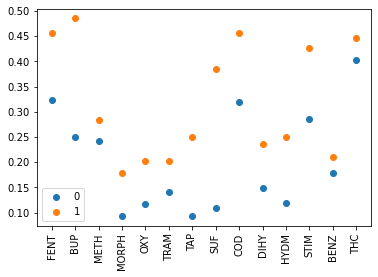

In [135]:
plot_pattern(data, False, 'DEM_STDNT')

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [99]:
df = get_use_cat(data)
X = df[['OTH_RX_DRUG_USE','TOB_USE','CAN_USE','ALC_USE','COKE_USE','CRACK_USE','MDMA_USE','SPEED_USE','GHB_USE',
        'HEROIN_USE','KET_USE','LEGAL_USE','LSD_USE','MUSH_USE','STER_USE','NPFENT_USE',
        'INH_USE','MEPH_USE']]
y = df['DAST_CAT']
X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.4, random_state=42)

In [107]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
# cross validation, k = 10 k should be like a lot...?
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.511295681063123

In [104]:
X_train_predict = clf.predict(X_train)
X_test_predict = clf.predict(X_test)
print(sum(y_train == X_train_predict)/len(X_train),
      sum(y_test == X_test_predict)/len(X_test))

0.5687707641196014 0.5039030061451586
